## Importando bibliotecas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

## DatraFrame

In [3]:
df = pd.read_csv('cubo_analises.csv')

In [4]:
df.head()

,produto,uf,regiao,profissao,anomes,sum_dias_atraso,soma_bad_rate,qtd
0,veiculo,ES,Sudeste,Meteorologista,202009.0,86.0,1,1
1,imobiliario,PR,Sul,Arquiteturo,NaN,NaN,1,1
2,crediario,GO,Centro-Oeste,Cientista da Computacao,NaN,NaN,1,1
3,crediario,BA,Nordeste,Jornalista,NaN,NaN,1,1
4,crediario,SC,Sul,Arquiteturo,202001.0,0.0,0,1


## Exemplos postgres

1. Vamos verificar qual produto	é o mais 'popular' no nosso banco. Para isso, vamos levantar a volumetria de aparições	

In [14]:
df.groupby('produto').sum()['qtd'].to_frame()

,qtd
produto,
consignado,35
crediario,29
imobiliario,26
veiculo,30


In [5]:
df.pivot_table(index='produto', values='qtd', aggfunc='sum')

,qtd
produto,
consignado,35
crediario,29
imobiliario,26
veiculo,30


2. Vamos calcular a média de dias de atraso para cada mês de referência presente nestas tabelas.

In [8]:
df.pivot_table(index='anomes', values='sum_dias_atraso', aggfunc='mean').round(2)

,sum_dias_atraso
anomes,
202001.0,0.00
202002.0,0.00
202003.0,57.67
202004.0,79.00
202005.0,62.50
202006.0,5.75
202007.0,0.00
202008.0,0.00
202009.0,101.00


3. Podemos calcular a bad rate para cada produto desta empresa

In [9]:
df_produto = df.groupby(['produto']).sum().eval('bad_rate = soma_bad_rate / qtd')[['bad_rate']]
df_produto

,bad_rate
produto,
consignado,0.914286
crediario,0.793103
imobiliario,0.884615
veiculo,0.866667


## Gráficos

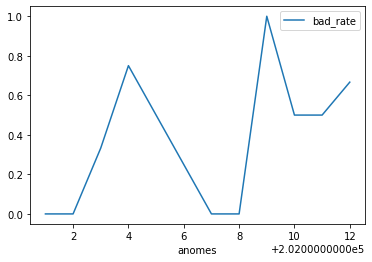

In [78]:
df_anomes = df.groupby(['anomes']).sum().eval('bad_rate = soma_bad_rate / qtd')[['bad_rate']]
df_anomes.plot();

In [103]:
df_anomes = df_anomes.reset_index().astype({'anomes': 'int'}).astype({'anomes': 'string'})
df_anomes = df_anomes.set_index('anomes')
df_anomes = df_anomes[['bad_rate']]

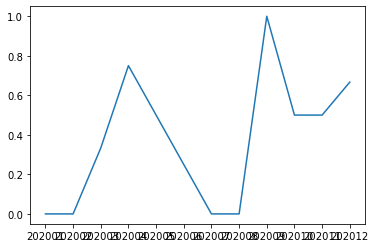

In [104]:
plt.plot(df_anomes);

<BarContainer object of 4 artists>

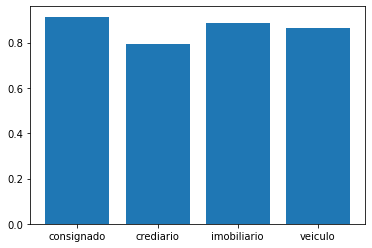

In [96]:
df_produto = df.groupby(['produto']).sum().eval('bad_rate = soma_bad_rate / qtd')[['bad_rate']]
plt.bar(df_produto.index, df_produto.bad_rate);

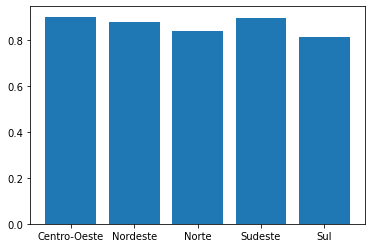

In [97]:
df_regiao = df.groupby(['regiao']).sum().eval('bad_rate = soma_bad_rate / qtd')[['bad_rate']]
plt.bar(df_regiao.index, df_regiao.bad_rate);

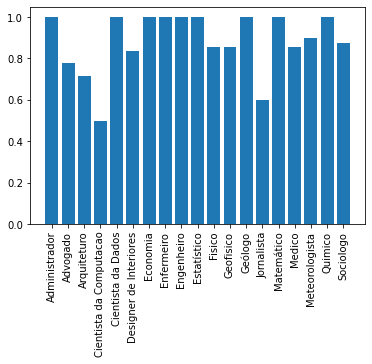

In [114]:
df_profissao = df.groupby(['profissao']).sum().eval('bad_rate = soma_bad_rate / qtd')[['bad_rate']]
plt.bar(df_profissao.index, df_profissao.bad_rate)

plt.xticks(rotation=90);

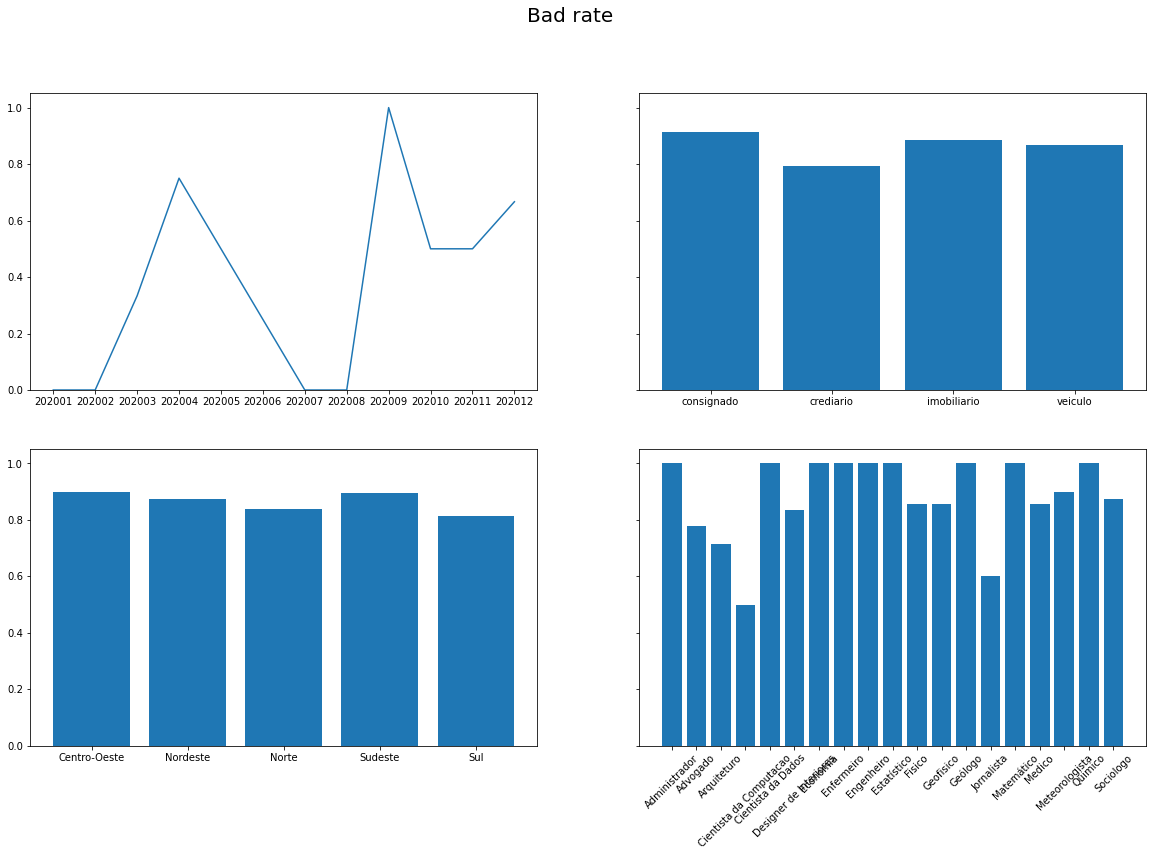

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(20,12), sharey = True)
fig.suptitle('Bad rate', fontsize=20)
axs[0][0].plot(df_anomes)
axs[0][1].bar(df_produto.index, df_produto.bad_rate)
axs[1][0].bar(df_regiao.index, df_regiao.bad_rate)
axs[1][1].bar(df_profissao.index, df_profissao.bad_rate)
plt.xticks(rotation=45);